# US Airline Satisfaction Mini Project 

In this Project, we would like to peform some analysis on a dataset of __[US Airline passenger satisfaction survey](https://www.kaggle.com/datasets/najibmh/us-airline-passenger-satisfaction-survey?resource=download)__.

## Contents
- [Problem](#problem)
- [Data Preparation](#data-preparation)
- [Exploratory Analysis](#exploratory-analysis)
- [Sampling](#sampling)

---

<a id="problem"></a>
## Problem
Based on passenger ratings, we would like to find out how the different indivudal ratings affect the passenger's final decision for a _satisfied_ or _unsatisfied_ with the service provided by US Airline.

**Specifically**:
1. Can we predict if customer would be satified?
1. What are the most important factors that affect customer satisfaction?

---

<a id="data-preparation"></a>
## Data Preparation

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() # set the default Seaborn style for graphics

### Import the Dataset
Source: __[US Airline passenger satisfaction survey](https://www.kaggle.com/datasets/najibmh/us-airline-passenger-satisfaction-survey?resource=download)__

Attached file: `satisfaction_v2.csv`  

In [2]:
satisfactionData = pd.read_csv('satisfaction.csv')
satisfactionData.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
satisfactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

#### Initial Observations
* There are `24` columns and `129880` rows in the dataset.   
* The response variable seems to be `satisfaction_v2`.
* The following `5` columns are non-predictor/unlikly to be predictors: ID, Gender, Customer Type, Age and Type of Travel.
* The remaining `18` columns are potential predictor variables.

#### Predictor Variables
* There are `16` variables identified as `int64` by default. But it seems like only `Flight Distance` and `Departure Delay in Minutes` are actually numeric. The remaining `14` variables are ratings from 0 to 5 and should be considered as Categorical.
* The `Arrivial Delay in Minutes` variable identified as `float64` by default, and it seems to be Numeric.
* The`Class` variable identified as `object` by default, and are most likely Categorical.  
* We noted that `Arrivial Delay in Minutes` seems to be missing some values.

### Dataset Cleaning

<div class="alert alert-block alert-info">
    <b>Missing Values: </b> It's noted that <code>Arrivial Delay in Minutes</code> has count <code>129487</code> instead of <code>129880</code>. This is due to it containing <code>NULL</code> values. We will replace them with <code>0</code> here.
</div>

In [4]:
# Check count
satisfactionData['Arrival Delay in Minutes'].count()

129487

In [5]:
satisfactionData['Arrival Delay in Minutes'].fillna(value=0, inplace=True)
# Check count
satisfactionData['Arrival Delay in Minutes'].count()

129880

<div class="alert alert-block alert-info">
    Check that the <code>id</code>s are unique. 
</div>

In [6]:
len(satisfactionData["id"].unique())

129880

<div class="alert alert-block alert-info">
    <b>Ordinal Categorical Variables</b><br>
    Most ordinal categorical variables are rating types in the <code>int</code> form. No conversion required. <br>
    But we will convert for <code>non-int</code> types <code>Class</code> and <code>Customer Type</code> in 
    <a href="#exploratory-analysis">Exploratory Analysis</a>
</div>

---
<a id="exploratory-analysis"></a>
## Exploratory Analysis

### Response Variable
Lets take a look at the response variable `satisfaction_v2`.

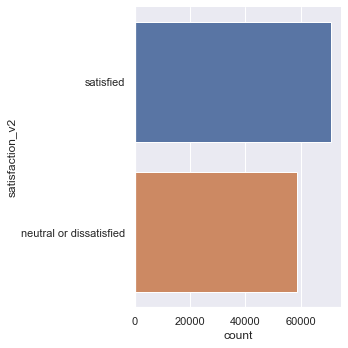

In [7]:
sb.catplot(y = 'satisfaction_v2', data = satisfactionData, kind = "count")

In [8]:
countG, countB = satisfactionData['satisfaction_v2'].value_counts()
print("[satisfied] : [neutral/dissatisfied] = [", countG, "] : [", countB, "]")

[satisfied] : [neutral/dissatisfied] = [ 71087 ] : [ 58793 ]


<div class="alert alert-block alert-info">
    The <code>satisfied</code> to <code>neutral/dissatisfied</code> ratio of <code> 71087 : 58794 </code> is acceptable. We will not perform any rebalancing. 
</div>

### Predictor Variables
Lets take a look at the `18` predictor variables.<br>
We shall split them into the following subcategories.

* Passenger: variables relating to the passenger.
* Service: variables corresponding to the services provided by the airline.
* Others: variables that are do not fall in the above categories.

In [9]:
satisfactionData.iloc[:,6:24].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Class                              129880 non-null  object 
 1   Flight Distance                    129880 non-null  int64  
 2   Seat comfort                       129880 non-null  int64  
 3   Departure/Arrival time convenient  129880 non-null  int64  
 4   Food and drink                     129880 non-null  int64  
 5   Gate location                      129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Inflight entertainment             129880 non-null  int64  
 8   Online support                     129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  On-board service                   129880 non-null  int64  
 11  Leg room service                   1298

#### Passenger Variables
Variables relating to the passenger. <br>
**Categorical** : `Class` `Departure/Arrival time convenient` `Type of Travel` `Customer Type` `Gender` <br>
**Numeric** : `Age` <br>

<div class="alert alert-block alert-info">
    <b>Class (Categorical)</b><br>
    The class variable seems to describle the type of flight class the passenger was in.<br>
    Since this is normally choosen by the passenger, we labeled it under <b>Passenger Variables</b><br>
    <b>Values</b><br>
    We observed that there are 3 unique values for <code>Class</code> variable.<br>
    It seems like their ordinal values(ascending) are as follows:<br>
    1: <code>Eco</code> 2: <code>Eco Plus</code> 3: <code>Business</code><br> 
    We will convert them accordingly. <br>
    <b>Distribution</b><br>
    The most common value is <code>Business</code> which is followed closely by <code>Eco</code>.<br>    
    <code>Eco Plus</code> has the least distribution. <br>
    <b>Relation</b><br>
    <code>Business</code> class have the higest satisfied rate while passengers from <code>Eco</code> and
    <code>Eco Plus</code> have higher neutral/disatisfied ratings.
</div>

In [10]:
print(satisfactionData['Class'].describe())
classTypes = satisfactionData['Class'].unique()
print(classTypes)

count       129880
unique           3
top       Business
freq         62160
Name: Class, dtype: object
['Eco' 'Business' 'Eco Plus']


In [11]:
from pandas.api.types import CategoricalDtype
cat_type_class = CategoricalDtype(categories=['Eco', 'Eco Plus', 'Business'], ordered=True)
satisfactionData['Class'] = satisfactionData["Class"].astype(cat_type_class)
satisfactionData['Class'].head()

0         Eco
1    Business
2         Eco
3         Eco
4         Eco
Name: Class, dtype: category
Categories (3, object): ['Eco' < 'Eco Plus' < 'Business']

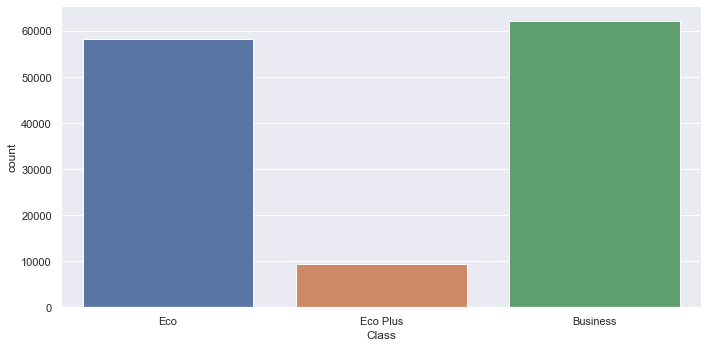

In [12]:
sb.catplot(x = 'Class', data = satisfactionData, kind = "count", aspect= 2)

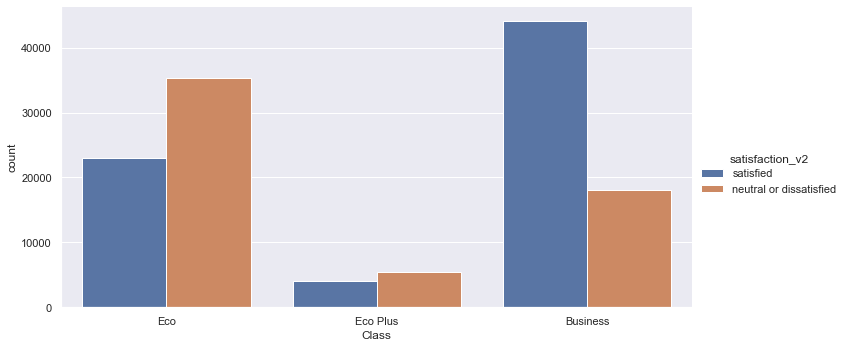

In [13]:
sb.catplot(x='Class', data = satisfactionData, hue= 'satisfaction_v2', kind = "count", aspect= 2)

<AxesSubplot:xlabel='Class', ylabel='satisfaction_v2'>

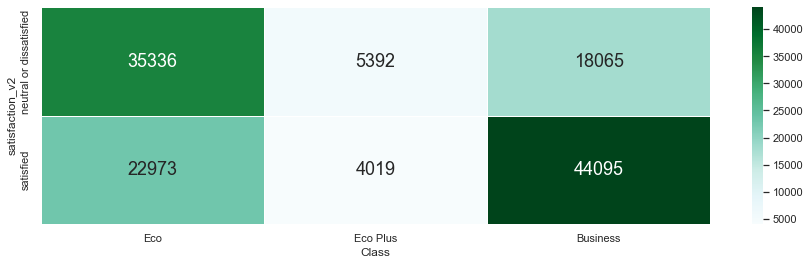

In [14]:
# satisfaction_v2 vs Class
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Class']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<div class="alert alert-block alert-info">
    <b>Departure/Arrival time convenient (Categorical)</b><br>
    This variable seems to describle covenience of the flight departure and arrival times.<br>
    Although flight timings are provided by the airline, the passenger normally pick the timeslot.<br>
    As such, we labeled it under <b>Customer Variables</b><br>
    <b>Values</b><br>
    We observed that there are 6 unique values from 0 to 6.<br>
    It is a <i>rating</i> type variable.<br>
    <b>Distribution</b><br>
    Rating <code>3</code> has the highest distribution followed closely by <code>2</code> and <code>4</code><br>    
    Rating <code>0</code> has the lowest distribution. <br>
    <b>Relation</b>
</div>

In [15]:
satisfactionData['Departure/Arrival time convenient'].describe()

count    129880.000000
mean          2.990645
std           1.527224
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Departure/Arrival time convenient, dtype: float64

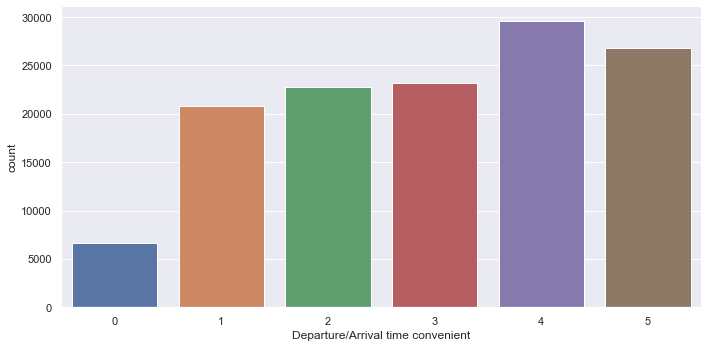

In [16]:
sb.catplot(x = 'Departure/Arrival time convenient', data = satisfactionData, kind = "count", aspect= 2)

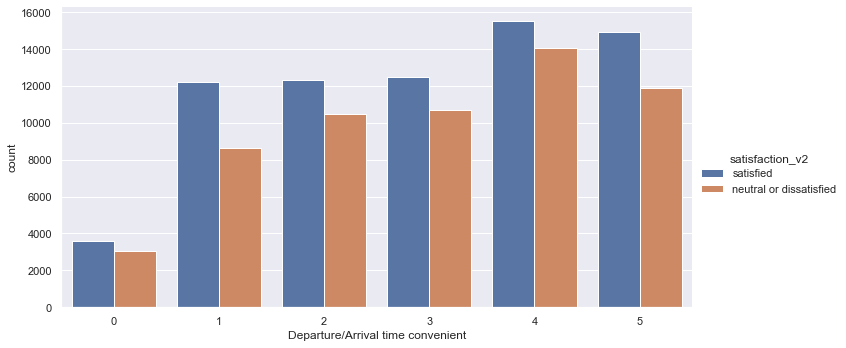

In [17]:
sb.catplot(x = 'Departure/Arrival time convenient', data = satisfactionData, 
           hue="satisfaction_v2", kind = "count", aspect= 2)

<AxesSubplot:xlabel='Departure/Arrival time convenient', ylabel='satisfaction_v2'>

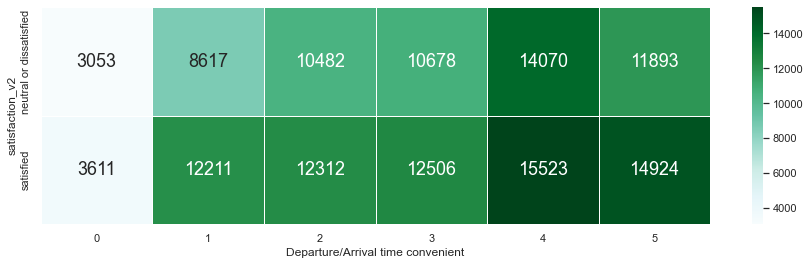

In [18]:
# satisfaction_v2 vs Departure/Arrival time convenient
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Departure/Arrival time convenient']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<div class="alert alert-block alert-info">
    <b>Type of Travel (Categorical)</b><br>
    This variable seems to describle type/purpose of travel of the passenger.<br>
    <b>Values</b><br>
    We observed that there are 2 unique values <code>Personal Travel</code> <code>Business travel</code> <br>
    <b>Distribution</b><br>
    <code>Business travel</code> has the higher distribution of 89693. <br>
    <b>Relation</b><br>
    <code>Business travel</code> appears to have higher satisfaction
</div>

In [19]:
print(satisfactionData['Type of Travel'].describe())
travelTypes = satisfactionData['Type of Travel'].unique()
print(travelTypes)

count              129880
unique                  2
top       Business travel
freq                89693
Name: Type of Travel, dtype: object
['Personal Travel' 'Business travel']


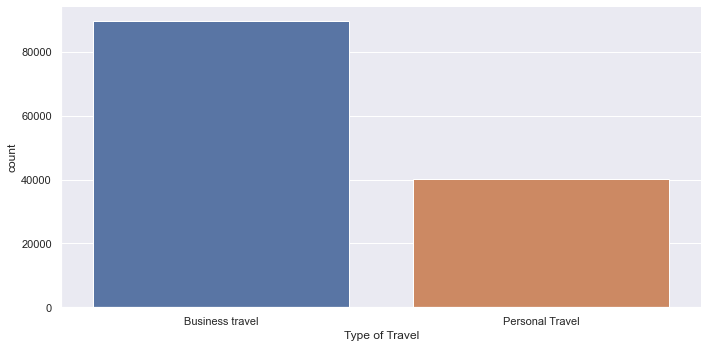

In [20]:
sb.catplot(x = 'Type of Travel', data = satisfactionData, kind = "count", 
           aspect= 2, order=['Business travel', 'Personal Travel'] )

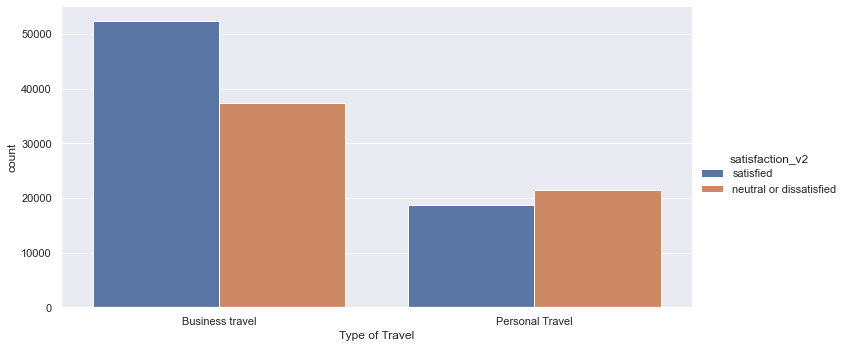

In [21]:
sb.catplot(x = 'Type of Travel', data = satisfactionData, kind = "count", hue="satisfaction_v2",
           aspect= 2, order=['Business travel', 'Personal Travel'])

<AxesSubplot:xlabel='Type of Travel', ylabel='satisfaction_v2'>

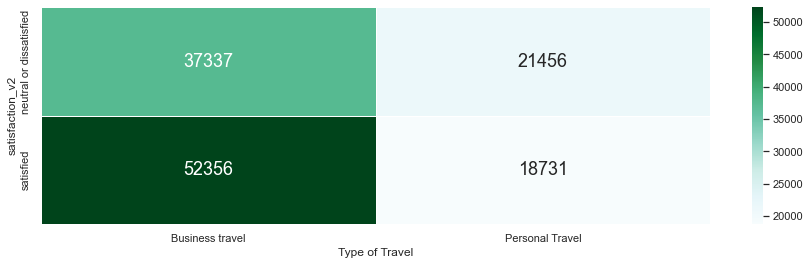

In [22]:
# satisfaction_v2 vs Customer Type
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Type of Travel']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<div class="alert alert-block alert-info">
    <b>Customer Type (Categorical)</b><br>
    This variable seems to describle if passenger is a loyal customer.<br>
    <b>Values</b><br>
    We observed that there are 2 unique values <code>Loyal Customer</code> <code>disloyal Customer</code> <br>
    We will assign them the weights as follows: <br>
    1: <code>disloyal Customer</code> 2: <code>Loyal Customer</code> <br>
    <b>Distribution</b><br>
    <code>Loyal Customer</code> has the higher distribution of 106100. <br>
    <b>Relation</b><br>
    <code>Loyal Customer</code> appears to have higher satisfaction rate
</div>

In [23]:
satisfactionData = pd.read_csv('satisfaction.csv')
print(satisfactionData['Customer Type'].describe())
customerTypes = satisfactionData['Customer Type'].unique()
print(customerTypes)

count             129880
unique                 2
top       Loyal Customer
freq              106100
Name: Customer Type, dtype: object
['Loyal Customer' 'disloyal Customer']


In [24]:
cat_type_customer = CategoricalDtype(categories=['disloyal Customer', 'Loyal Customer'], ordered=True)
satisfactionData['Customer Type'] = satisfactionData['Customer Type'].astype(cat_type_customer)
satisfactionData['Customer Type'].head()

0    Loyal Customer
1    Loyal Customer
2    Loyal Customer
3    Loyal Customer
4    Loyal Customer
Name: Customer Type, dtype: category
Categories (2, object): ['disloyal Customer' < 'Loyal Customer']

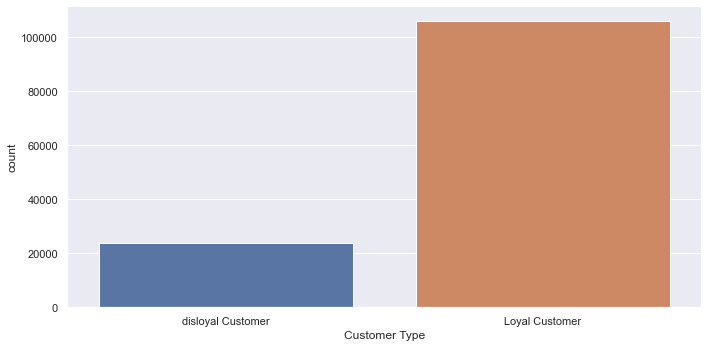

In [25]:
sb.catplot(x = 'Customer Type', data = satisfactionData, kind = "count", aspect= 2)

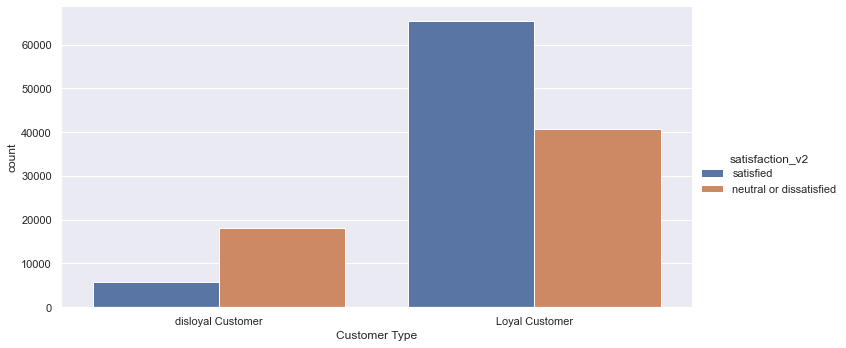

In [26]:
sb.catplot(x = 'Customer Type', data = satisfactionData, 
           hue="satisfaction_v2", kind = "count", aspect= 2)

<AxesSubplot:xlabel='Customer Type', ylabel='satisfaction_v2'>

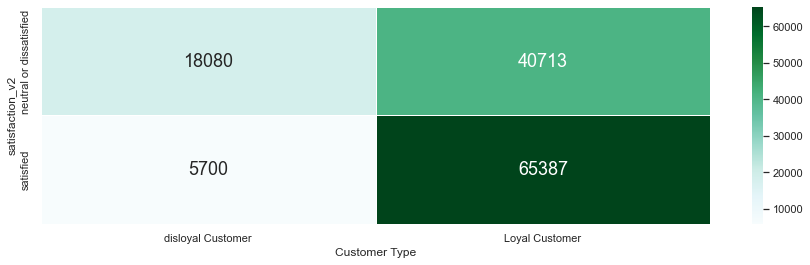

In [27]:
# satisfaction_v2 vs Customer Type
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Customer Type']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

#### Service Variables
_Rating_ type variables that are affected by the service provided by the airline.<br>
<code>Seat comfort</code> 
<code>Food and drink</code> 
<code>Inflight wifi service</code> 
<code>Inflight entertainment</code> 
<code>Online support</code> 
<code>Ease of Online booking</code> 
<code>On-board service</code> 
<code>Leg room service</code> 
<code>Baggage handling</code>
<code>Checkin service</code>
<code>Cleanliness</code>
<code>Online boarding</code>

#### Other Variables
Other variables that are not related to customer or airline service. <br>
<b>Categorical</b>: <code>Gate location </code> <br>
<b>Numeric</b> : 
<code>Flight Distance</code> 
<code>Departure Delay in Minutes</code> 
<code>Arrival Delay in Minutes</code>

<div class="alert alert-block alert-info">
    <b>Gate Location (Categorical)</b><br>
    This variable most likely represent the convenience of the gate location.<br>
    As the airline may not choose their gate location, we did not include under service.<br>
    <b>Values</b><br>
    We observed that there are 6 unique values from 0 to 6.<br>
    It is a <i>rating</i> type variable.<br>
    <b>Distribution</b><br>
    Rating <code>3</code> has the highest distribution. <br>
    Rating <code>0</code> has the lowest distribution. <br>
    <b>Relation</b><br>
    <code>Loyal Customer</code> appears to have higher satisfaction rate
</div>

In [28]:
satisfactionData['Gate location'].describe()

count    129880.000000
mean          2.990422
std           1.305970
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Gate location, dtype: float64

<Figure size 1080x576 with 0 Axes>

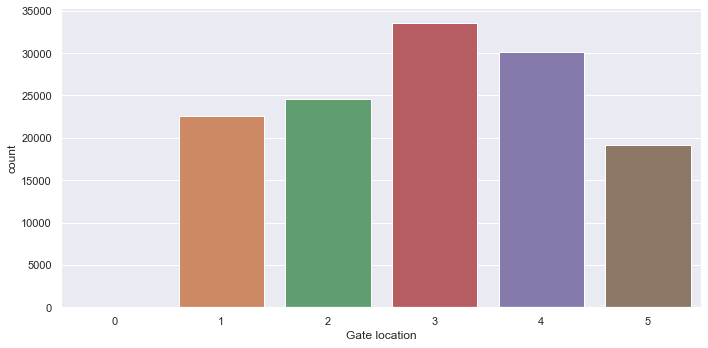

In [29]:
f = plt.figure(figsize=(15,8))
sb.catplot(x = 'Gate location', data = satisfactionData, kind = "count", aspect= 2)

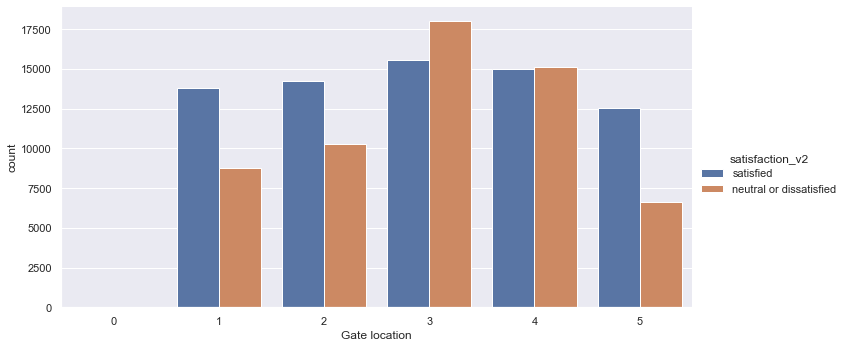

In [30]:
sb.catplot(x = 'Gate location', data = satisfactionData, 
           hue="satisfaction_v2", kind = "count", aspect= 2)

<AxesSubplot:xlabel='Gate location', ylabel='satisfaction_v2'>

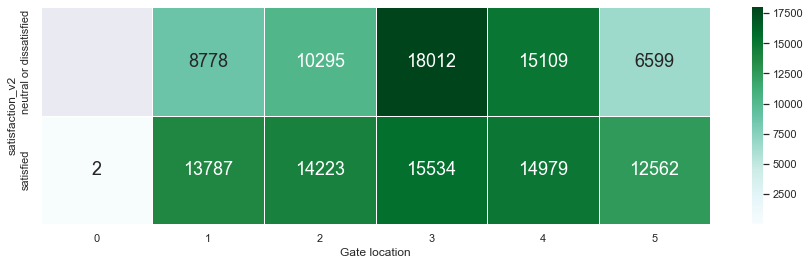

In [31]:
# satisfaction_v2 vs Gate location
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Gate location']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<div class="alert alert-block alert-info">
    <b>Flight Distance (Numeric)</b><br>
    This variable describes the flight distance most likely in miles.<br>
    <b>Relation</b><br>
    It appears that at below <code>1000</code> miles, satisfaction rate seems to be higher.<br>
</div>

In [32]:
satisfactionData['Flight Distance'].describe()

count    129880.000000
mean       1981.409055
std        1027.115606
min          50.000000
25%        1359.000000
50%        1925.000000
75%        2544.000000
max        6951.000000
Name: Flight Distance, dtype: float64

<AxesSubplot:>

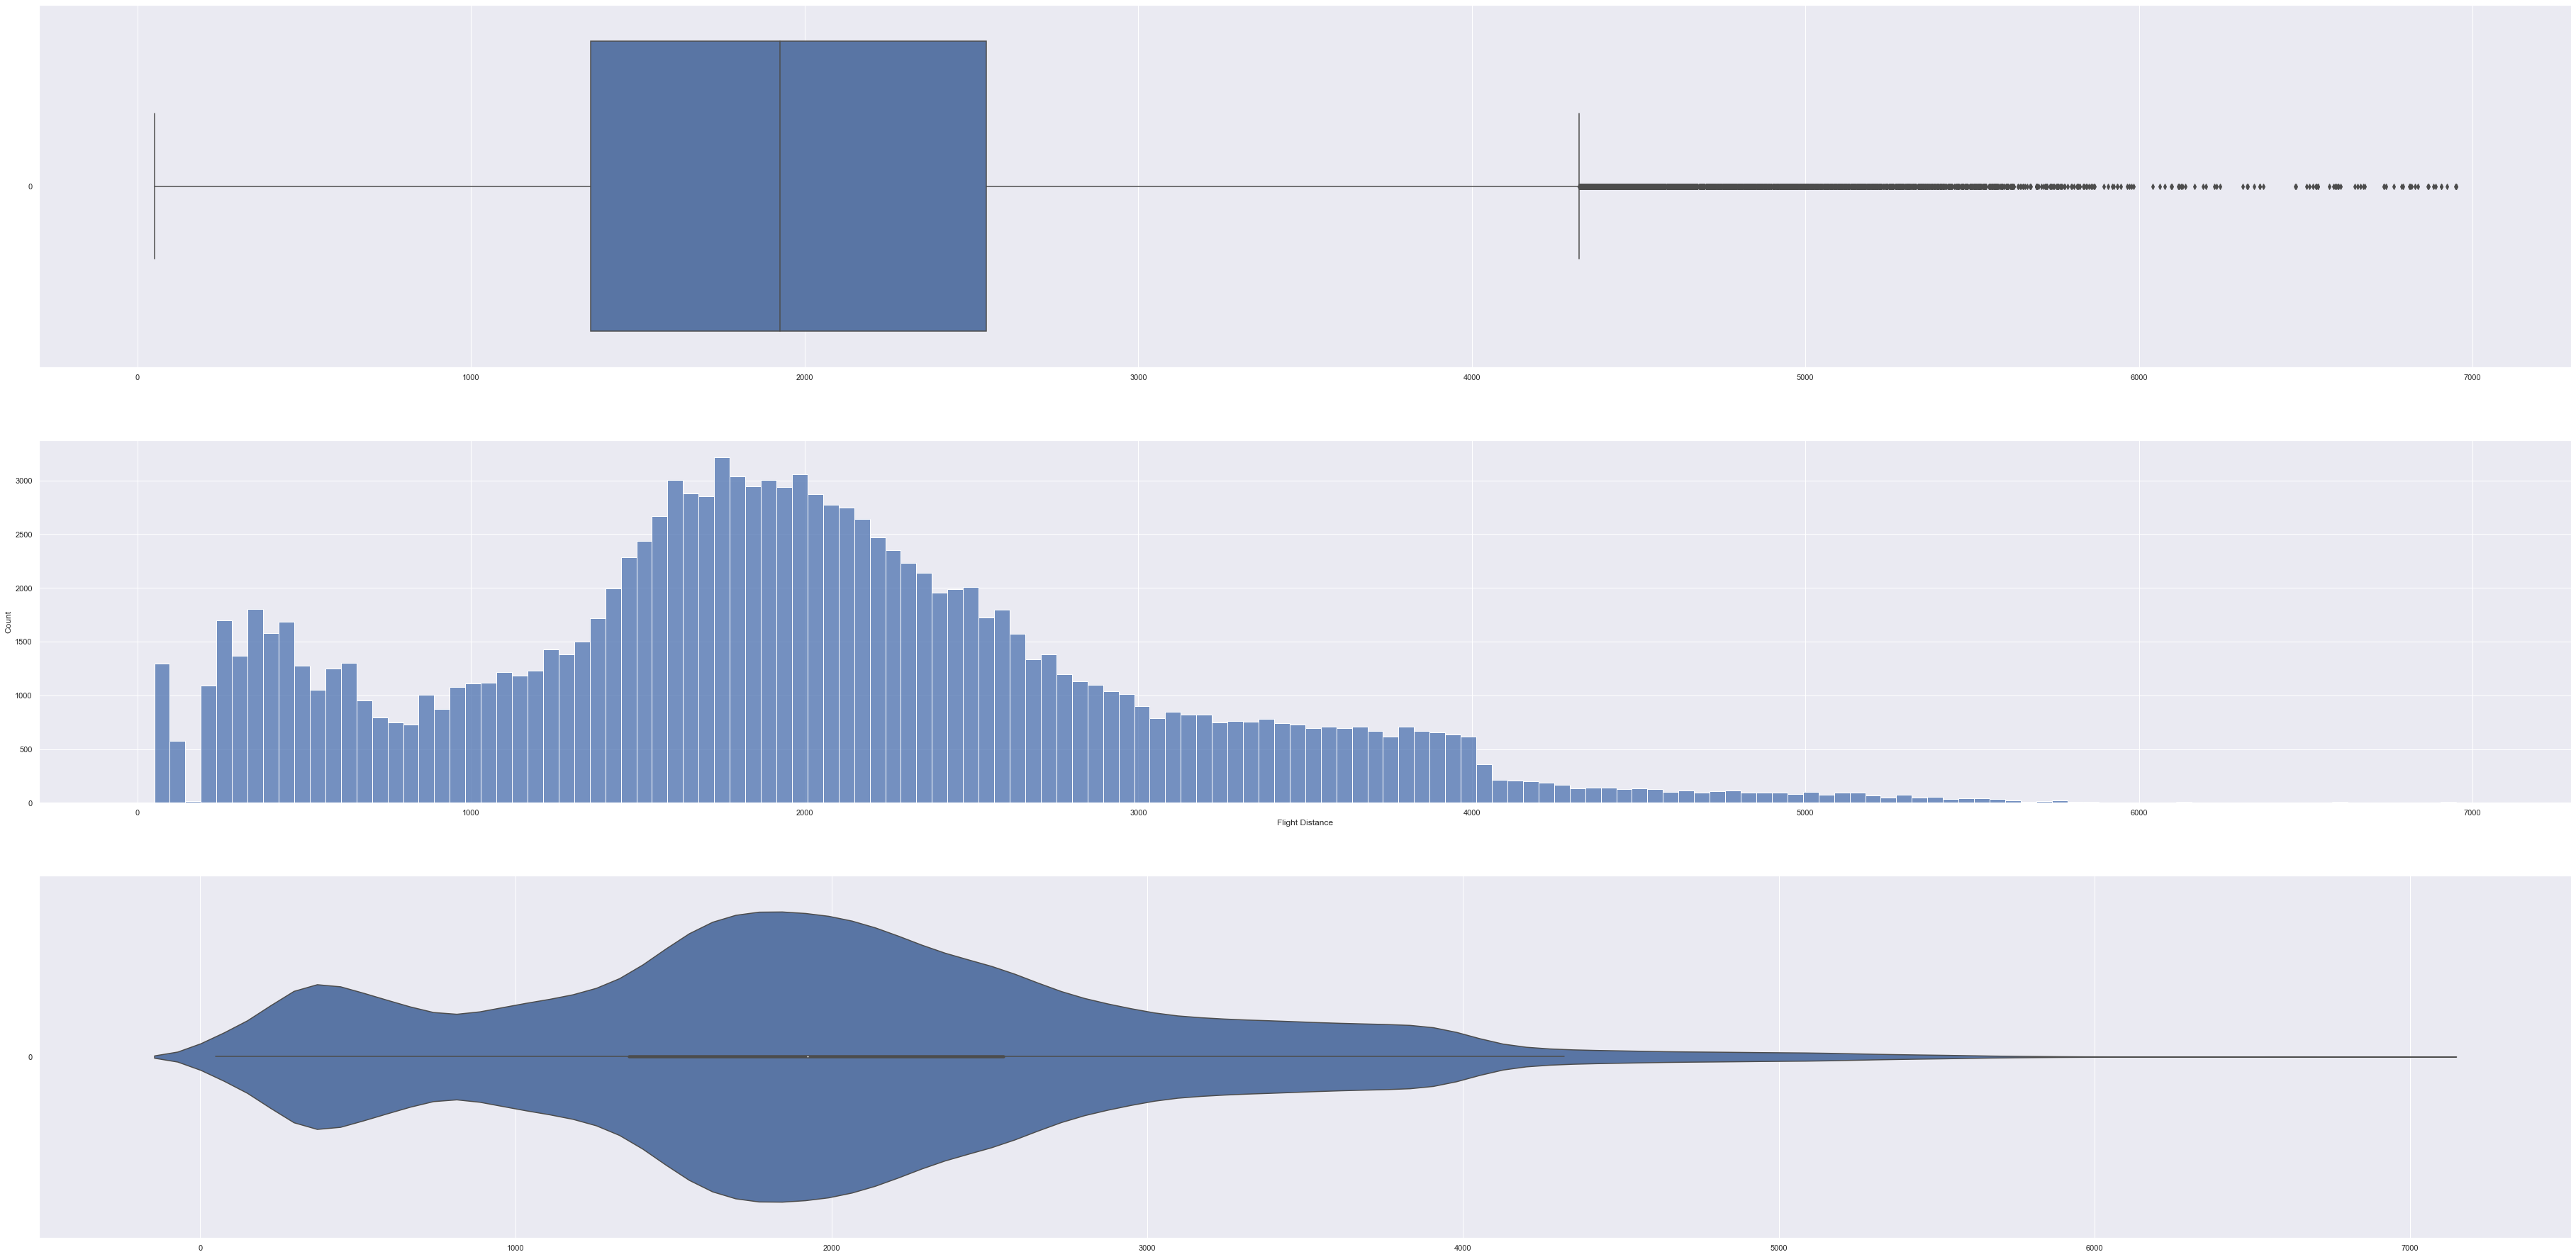

In [33]:
f, axes = plt.subplots(3, 1, figsize=(64, 32))
sb.boxplot(data = satisfactionData['Flight Distance'], orient = "h", ax = axes[0])
sb.histplot(data = satisfactionData['Flight Distance'], ax = axes[1])
sb.violinplot(data = satisfactionData['Flight Distance'], orient = "h", ax = axes[2])

<AxesSubplot:xlabel='Flight Distance', ylabel='satisfaction_v2'>

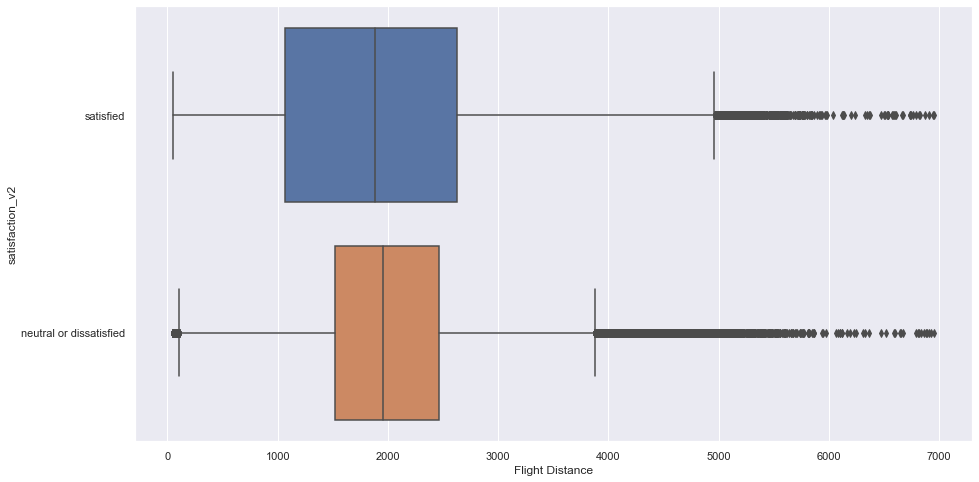

In [34]:
f = plt.figure(figsize=(15, 8))
sb.boxplot(data = satisfactionData, orient = "h",
          x ='Flight Distance', y = 'satisfaction_v2')

<AxesSubplot:xlabel='Flight Distance', ylabel='Density'>

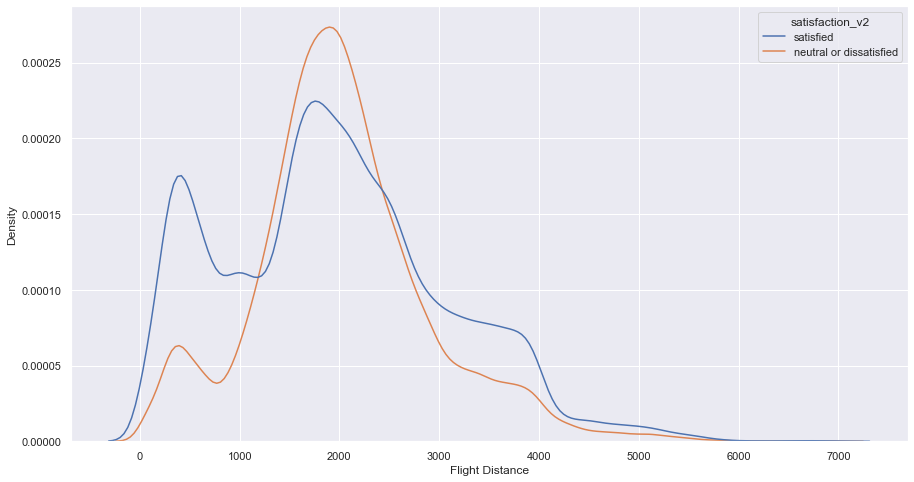

In [35]:
f = plt.figure(figsize=(15, 8))
sb.kdeplot(data = satisfactionData, x='Flight Distance',hue='satisfaction_v2')

<AxesSubplot:xlabel='Flight Distance', ylabel='satisfaction_v2'>

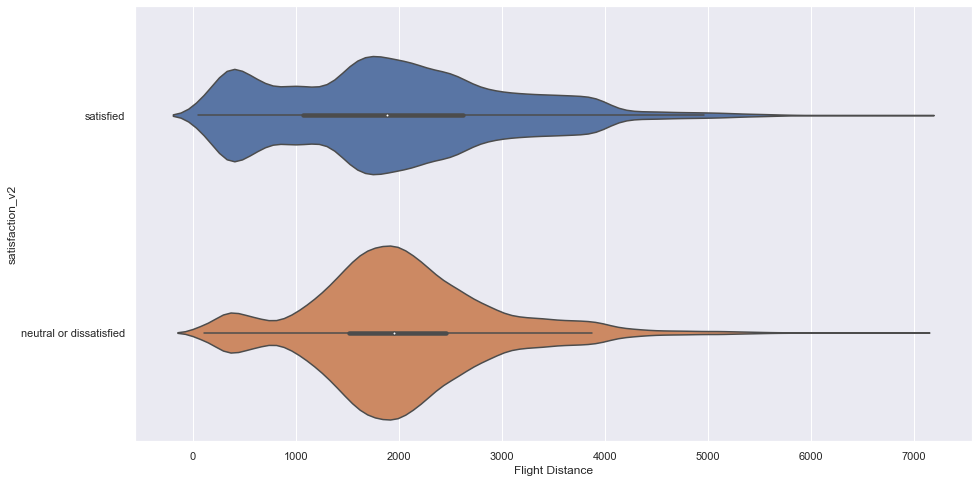

In [36]:
f = plt.figure(figsize=(15,8))
sb.violinplot(data = satisfactionData, orient = 'h',
              x = 'Flight Distance', y = 'satisfaction_v2')

<div class="alert alert-block alert-info">
    <b>Departure Delay in Minutes (Numeric)</b><br>
    We excluded <code>0</code> departure delays<br>
</div>

In [37]:
satisfactionData['Departure Delay in Minutes'].describe()

count    129880.000000
mean         14.713713
std          38.071126
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

In [38]:
departDelayData = satisfactionData.loc[~((satisfactionData['Departure Delay in Minutes'] == 0))]
departDelayData['Departure Delay in Minutes'].describe()

count    56524.000000
mean        33.808948
std         51.815693
min          1.000000
25%          6.000000
50%         16.000000
75%         40.000000
max       1592.000000
Name: Departure Delay in Minutes, dtype: float64

<AxesSubplot:>

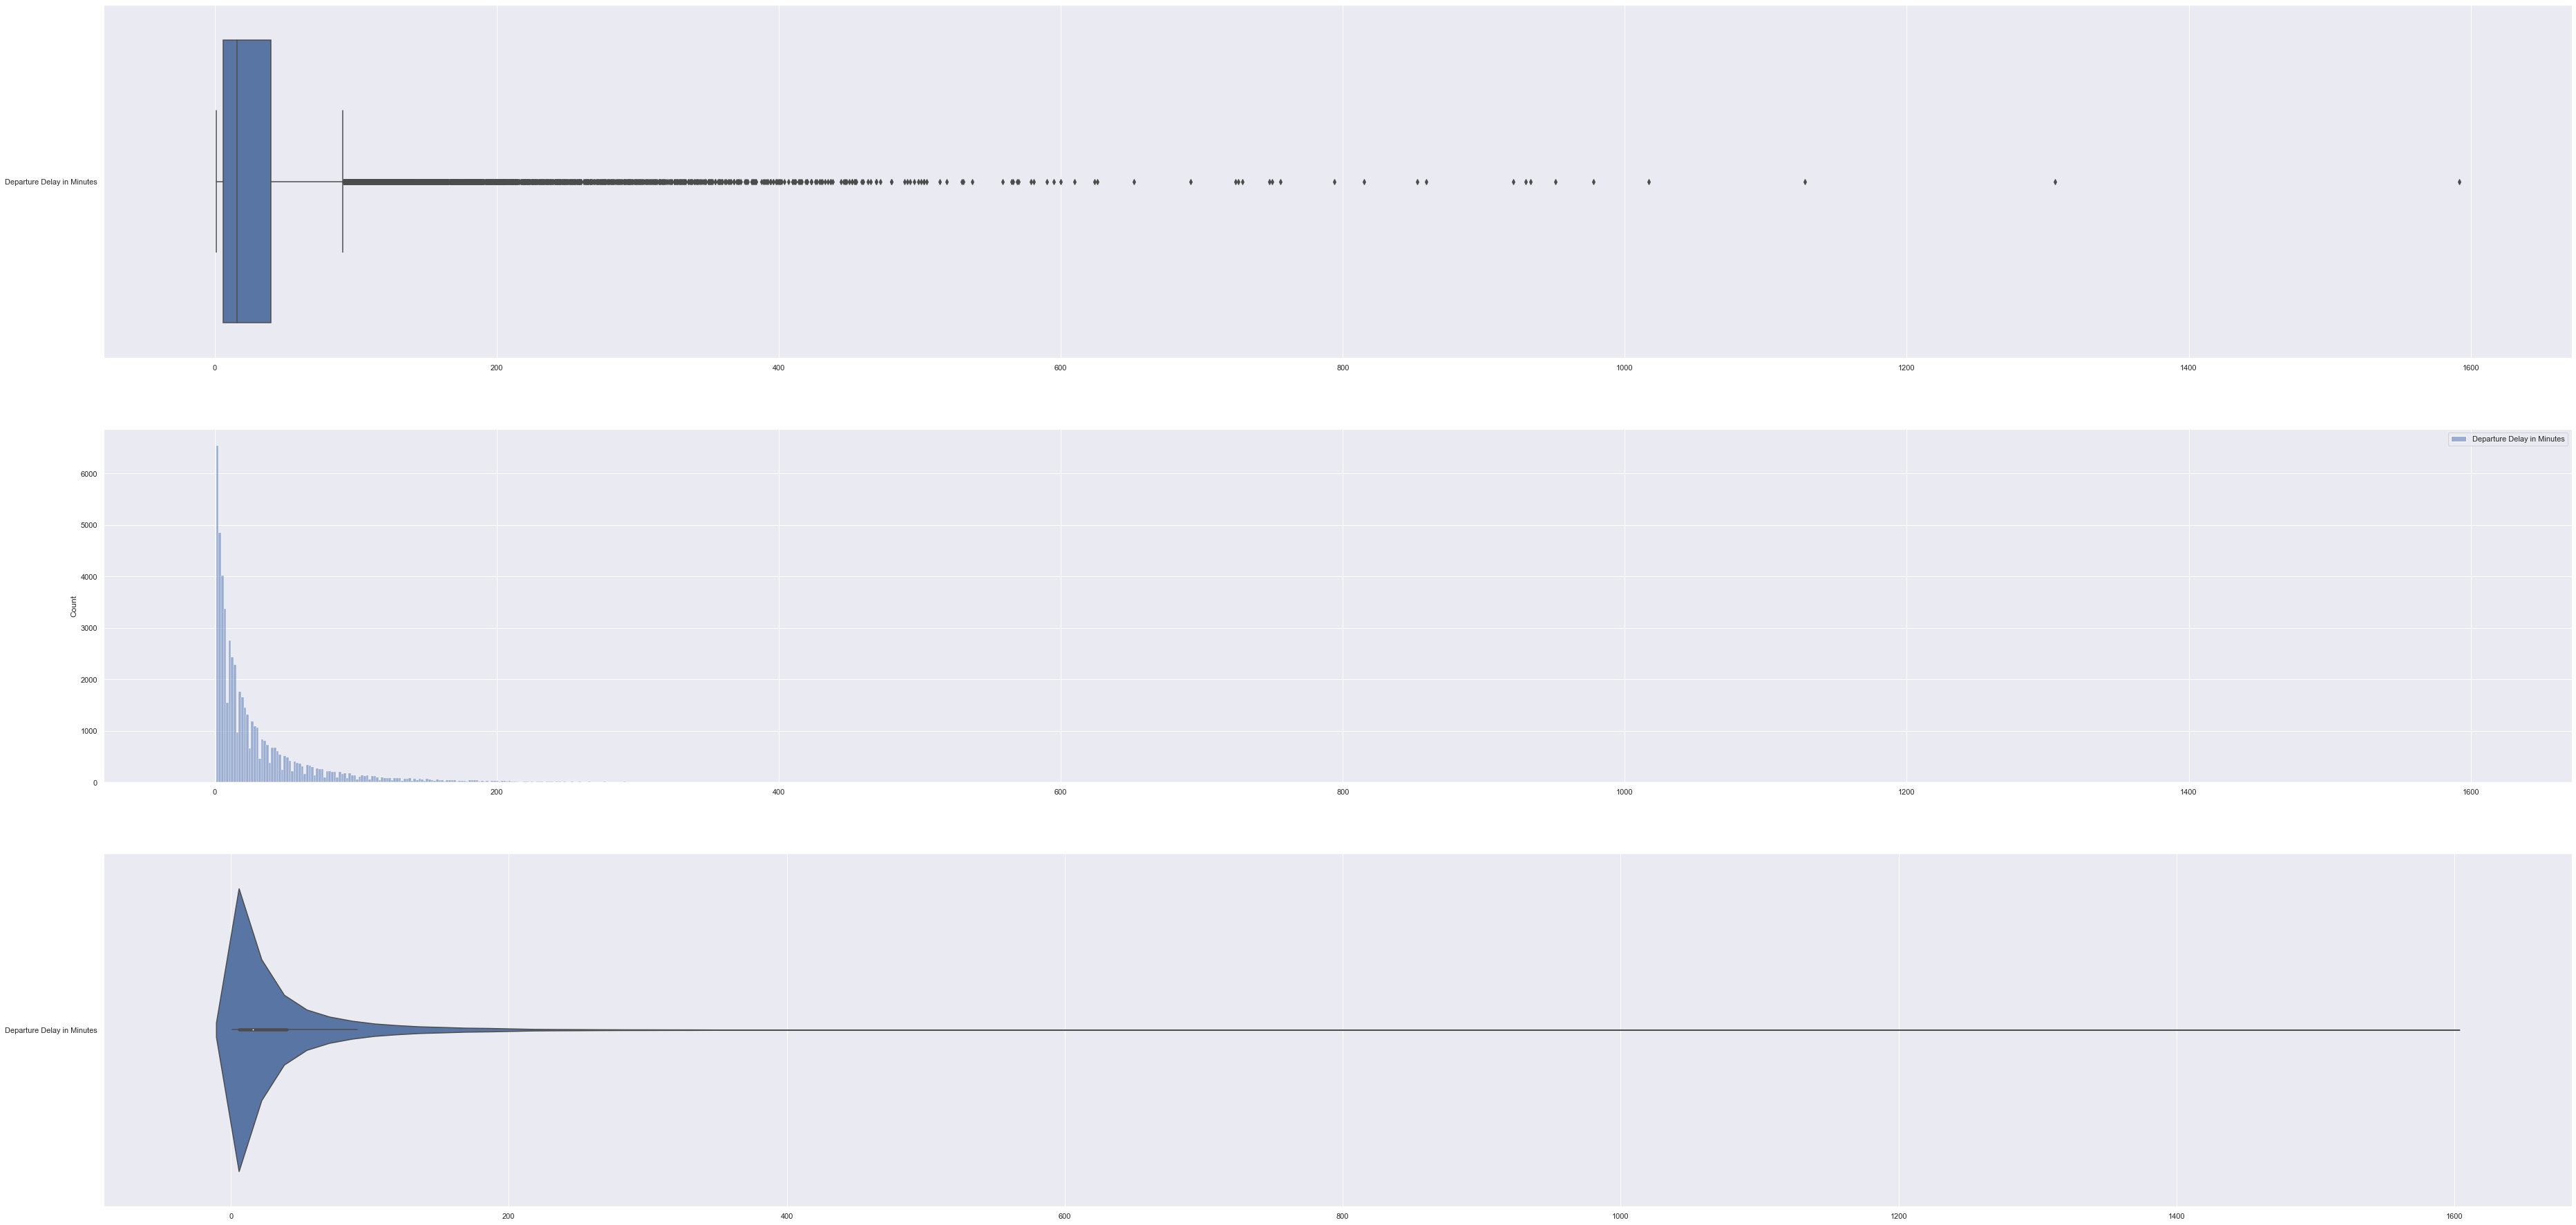

In [39]:
f, axes = plt.subplots(3, 1, figsize=(64, 32))
sb.boxplot(data = departDelayData[['Departure Delay in Minutes']], orient = "h", ax = axes[0])
sb.histplot(data = departDelayData[['Departure Delay in Minutes']], ax = axes[1])
sb.violinplot(data = departDelayData[['Departure Delay in Minutes']], orient = "h", ax = axes[2])
#sb.boxplot(data = departDelayData[['Departure Delay in Minutes']], orient = "h",showfliers=True)

<div class="alert alert-block alert-info">
    <b>Remove outliers</b>
</div>

In [40]:
departDelayDataClean = departDelayData[['Departure Delay in Minutes','satisfaction_v2']].copy()
# Calculate the quartiles
Q1 = departDelayDataClean.quantile(0.25)
Q3 = departDelayDataClean.quantile(0.75)
# Rule to identify outliers
rule = ((departDelayDataClean < (Q1 - 1.5 * (Q3 - Q1))) 
        | (departDelayDataClean > (Q3 + 1.5 * (Q3 - Q1))))
departDelayOutliers = rule.any(axis = 1)
departDelayOutlierindices = departDelayOutliers.index[departDelayOutliers == True]

# Remove the outliers based on the row indices obtained above
departDelayDataClean.drop(axis = 0,               # 0 drops row 1 drops column
                          index = departDelayOutlierindices, # this takes a list as input
                          inplace = True)         # not overwritten by default 
# Check the clean data
departDelayDataClean['Departure Delay in Minutes'].describe()

C:\Users\User\AppData\Local\Temp/ipykernel_19536/2597741788.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  rule = ((departDelayDataClean < (Q1 - 1.5 * (Q3 - Q1)))
C:\Users\User\AppData\Local\Temp/ipykernel_19536/2597741788.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  | (departDelayDataClean > (Q3 + 1.5 * (Q3 - Q1))))


count    51510.000000
mean        21.395127
std         21.213185
min          1.000000
25%          5.000000
50%         14.000000
75%         31.000000
max         91.000000
Name: Departure Delay in Minutes, dtype: float64

<AxesSubplot:>

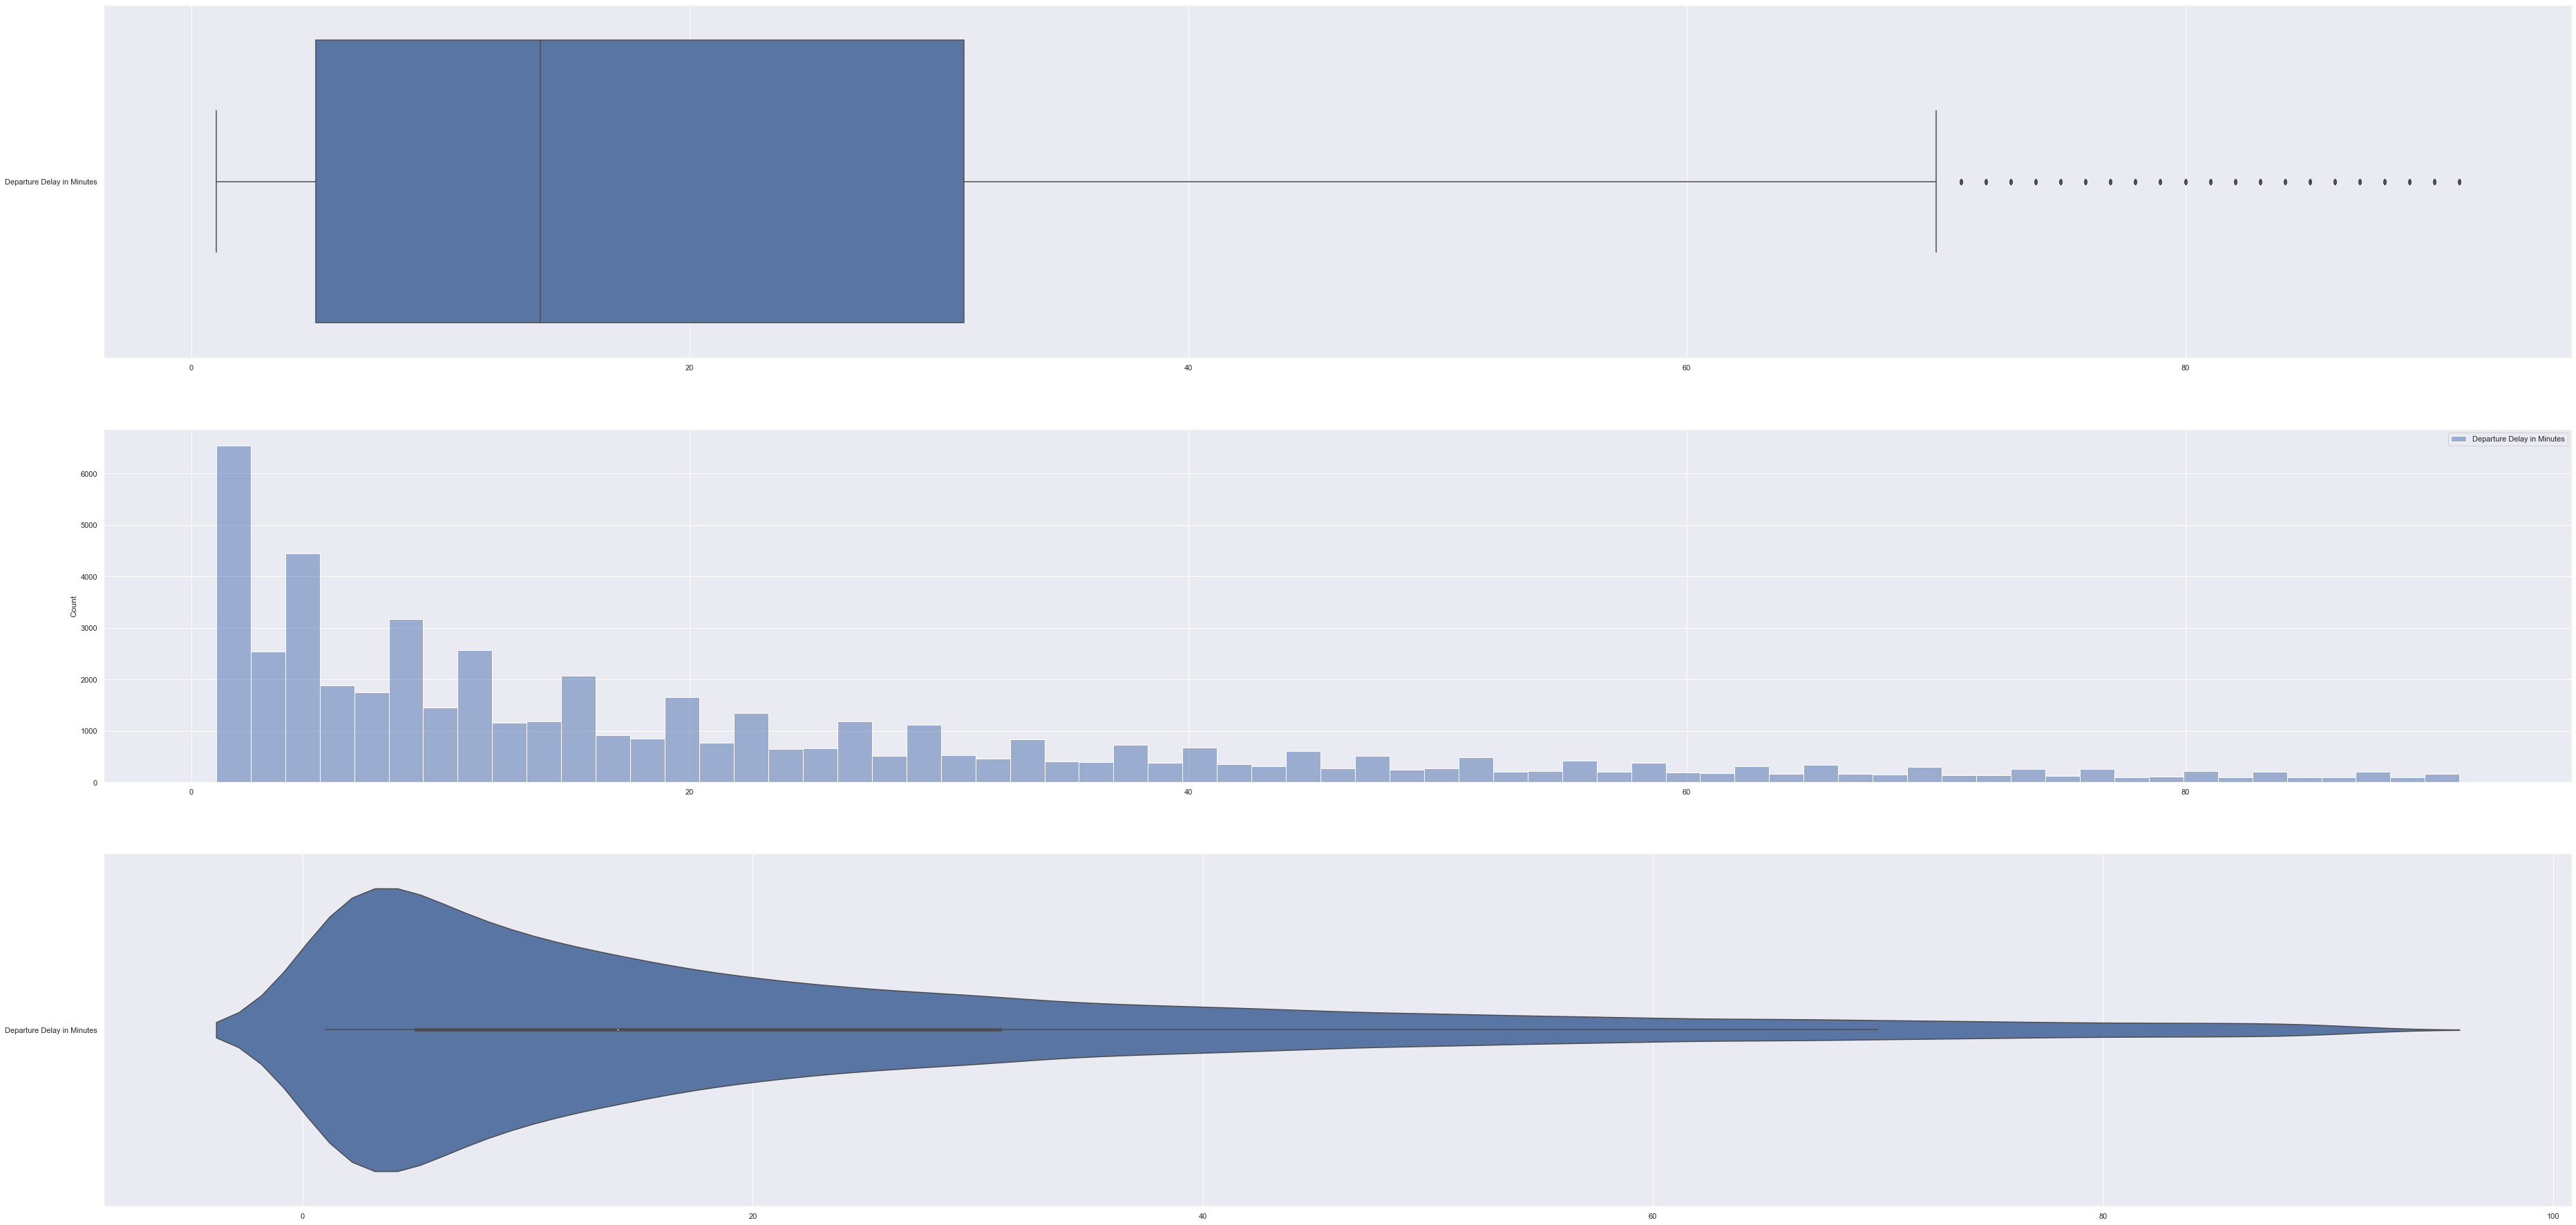

In [41]:
f, axes = plt.subplots(3, 1, figsize=(64, 32))
sb.boxplot(data = departDelayDataClean[['Departure Delay in Minutes']], orient = "h", ax = axes[0])
sb.histplot(data = departDelayDataClean[['Departure Delay in Minutes']], ax = axes[1])
sb.violinplot(data = departDelayDataClean[['Departure Delay in Minutes']], orient = "h", ax = axes[2])

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='satisfaction_v2'>

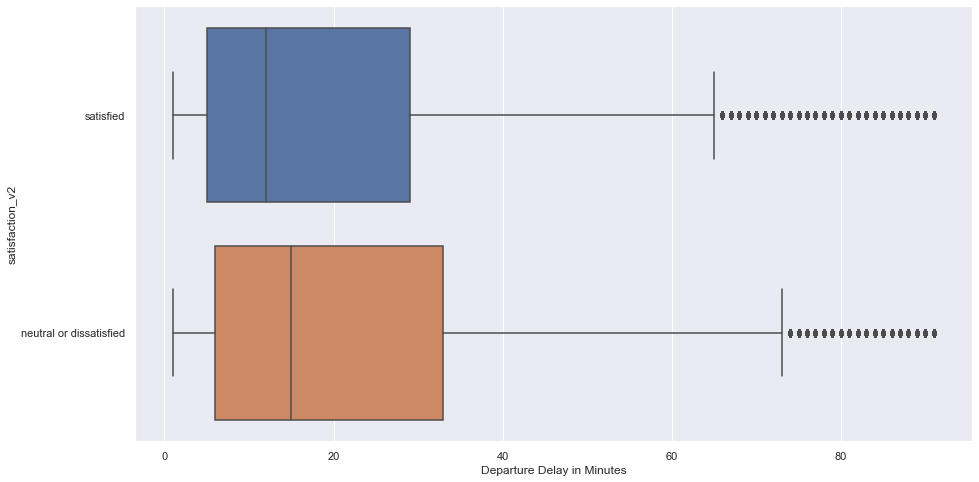

In [42]:
f = plt.figure(figsize=(15, 8))
sb.boxplot(data = departDelayDataClean, orient = "h",
          x ='Departure Delay in Minutes', y = 'satisfaction_v2')

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Density'>

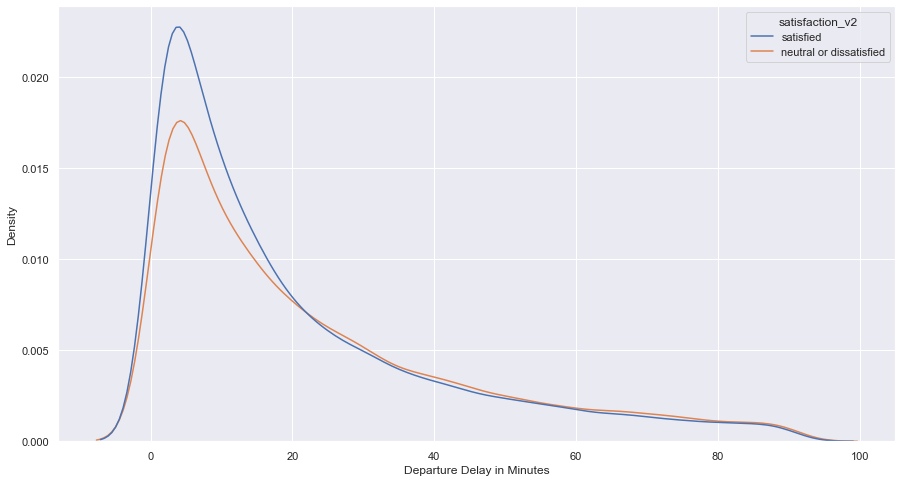

In [43]:
f = plt.figure(figsize=(15, 8))
sb.kdeplot(data = departDelayDataClean, x='Departure Delay in Minutes',hue='satisfaction_v2')

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='satisfaction_v2'>

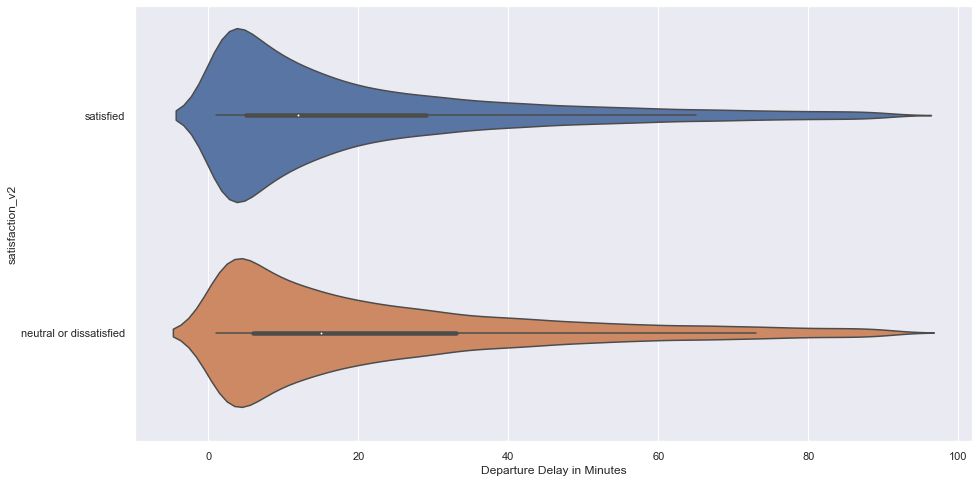

In [44]:
f = plt.figure(figsize=(15,8))
sb.violinplot(data = departDelayDataClean, orient = 'h',
              x = 'Departure Delay in Minutes', y = 'satisfaction_v2')

<div class="alert alert-block alert-info">
    <b>Arrival Delay in Minutes (Numeric)</b><br>
    We excluded <code>0</code> departure delays<br>
</div>

In [45]:
arriveDelayData = satisfactionData.loc[~((satisfactionData['Arrival Delay in Minutes'] == 0))]
arriveDelayData['Arrival Delay in Minutes'].describe()

count    56734.000000
mean        34.443279
std         52.062016
min          1.000000
25%          6.000000
50%         17.000000
75%         41.000000
max       1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [46]:
arriveDelayDataClean = arriveDelayData[['Arrival Delay in Minutes','satisfaction_v2']].copy()
# Calculate the quartiles
adQ1 = arriveDelayDataClean.quantile(0.25)
adQ3 = arriveDelayDataClean.quantile(0.75)
# Rule to identify outliers
adrule = ((arriveDelayDataClean < (adQ1 - 1.5 * (adQ3 - adQ1))) 
        | (arriveDelayDataClean > (adQ3 + 1.5 * (adQ3 - adQ1))))
arriveDelayOutliers = adrule.any(axis = 1)
arriveDelayOutlierindices = arriveDelayOutliers.index[arriveDelayOutliers == True]

# Remove the outliers based on the row indices obtained above
arriveDelayDataClean.drop(axis = 0,               # 0 drops row 1 drops column
                          index = arriveDelayOutlierindices, # this takes a list as input
                          inplace = True)         # not overwritten by default 
# Check the clean data
arriveDelayDataClean['Arrival Delay in Minutes'].describe()

C:\Users\User\AppData\Local\Temp/ipykernel_19536/2201753369.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  adrule = ((arriveDelayDataClean < (adQ1 - 1.5 * (adQ3 - adQ1)))
C:\Users\User\AppData\Local\Temp/ipykernel_19536/2201753369.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  | (arriveDelayDataClean > (adQ3 + 1.5 * (adQ3 - adQ1))))


count    51773.000000
mean        22.023255
std         21.393201
min          1.000000
25%          6.000000
50%         14.000000
75%         32.000000
max         93.000000
Name: Arrival Delay in Minutes, dtype: float64

<AxesSubplot:>

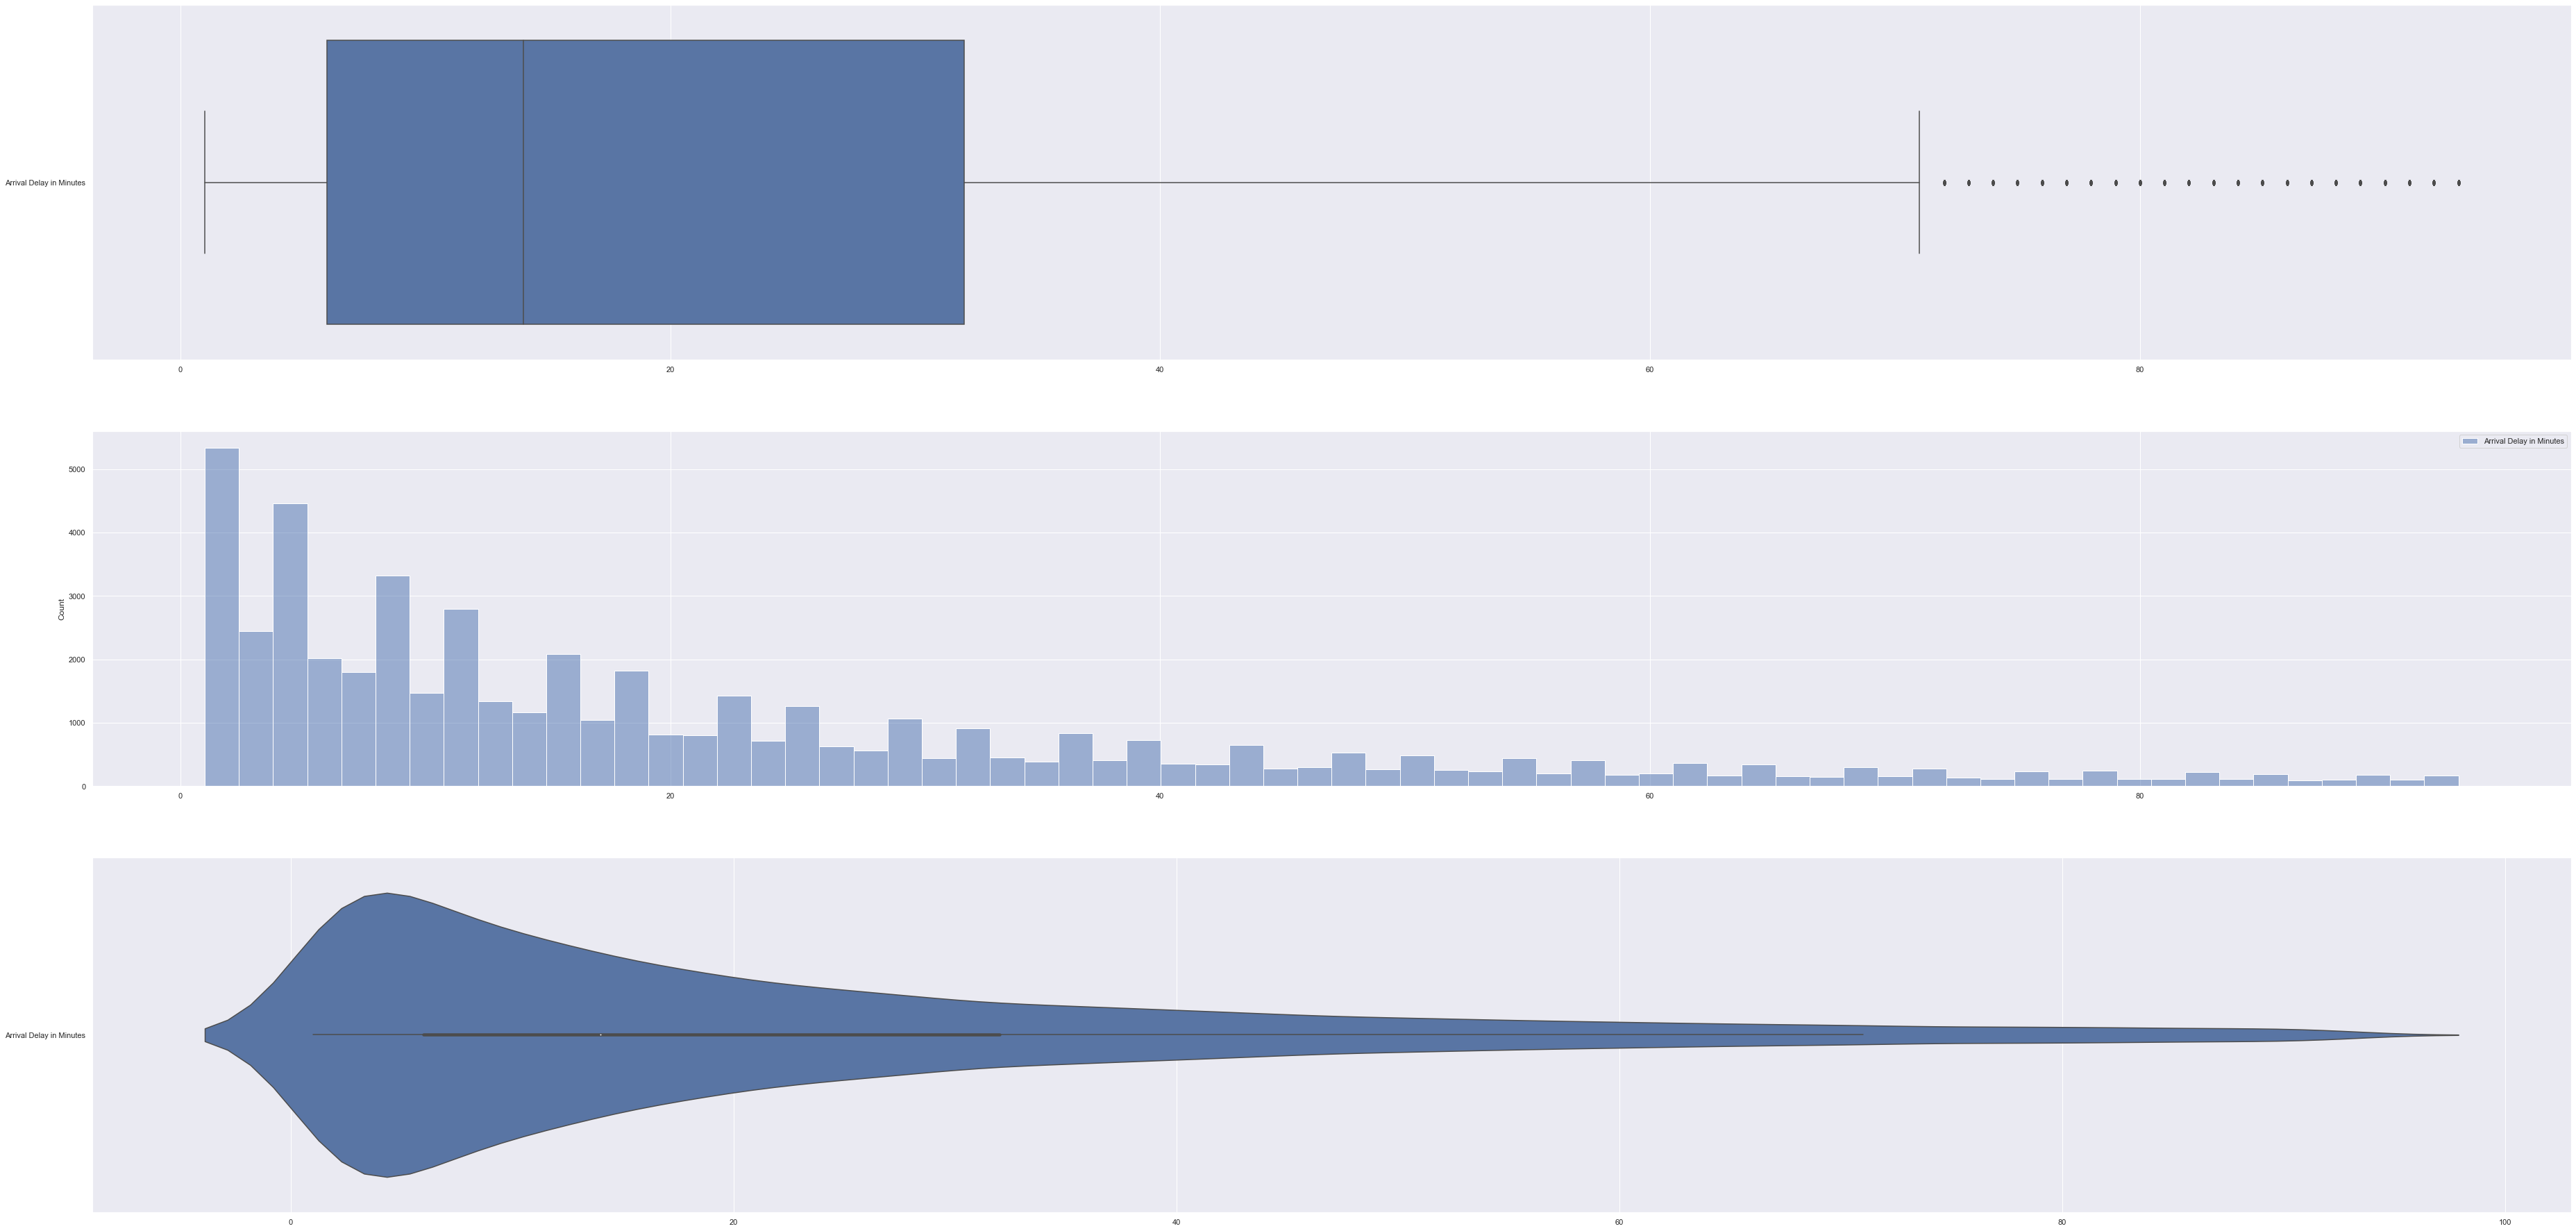

In [47]:
f, axes = plt.subplots(3, 1, figsize=(64, 32))
sb.boxplot(data = arriveDelayDataClean[['Arrival Delay in Minutes']], orient = "h", ax = axes[0])
sb.histplot(data = arriveDelayDataClean[['Arrival Delay in Minutes']], ax = axes[1])
sb.violinplot(data = arriveDelayDataClean[['Arrival Delay in Minutes']], orient = "h", ax = axes[2])

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='satisfaction_v2'>

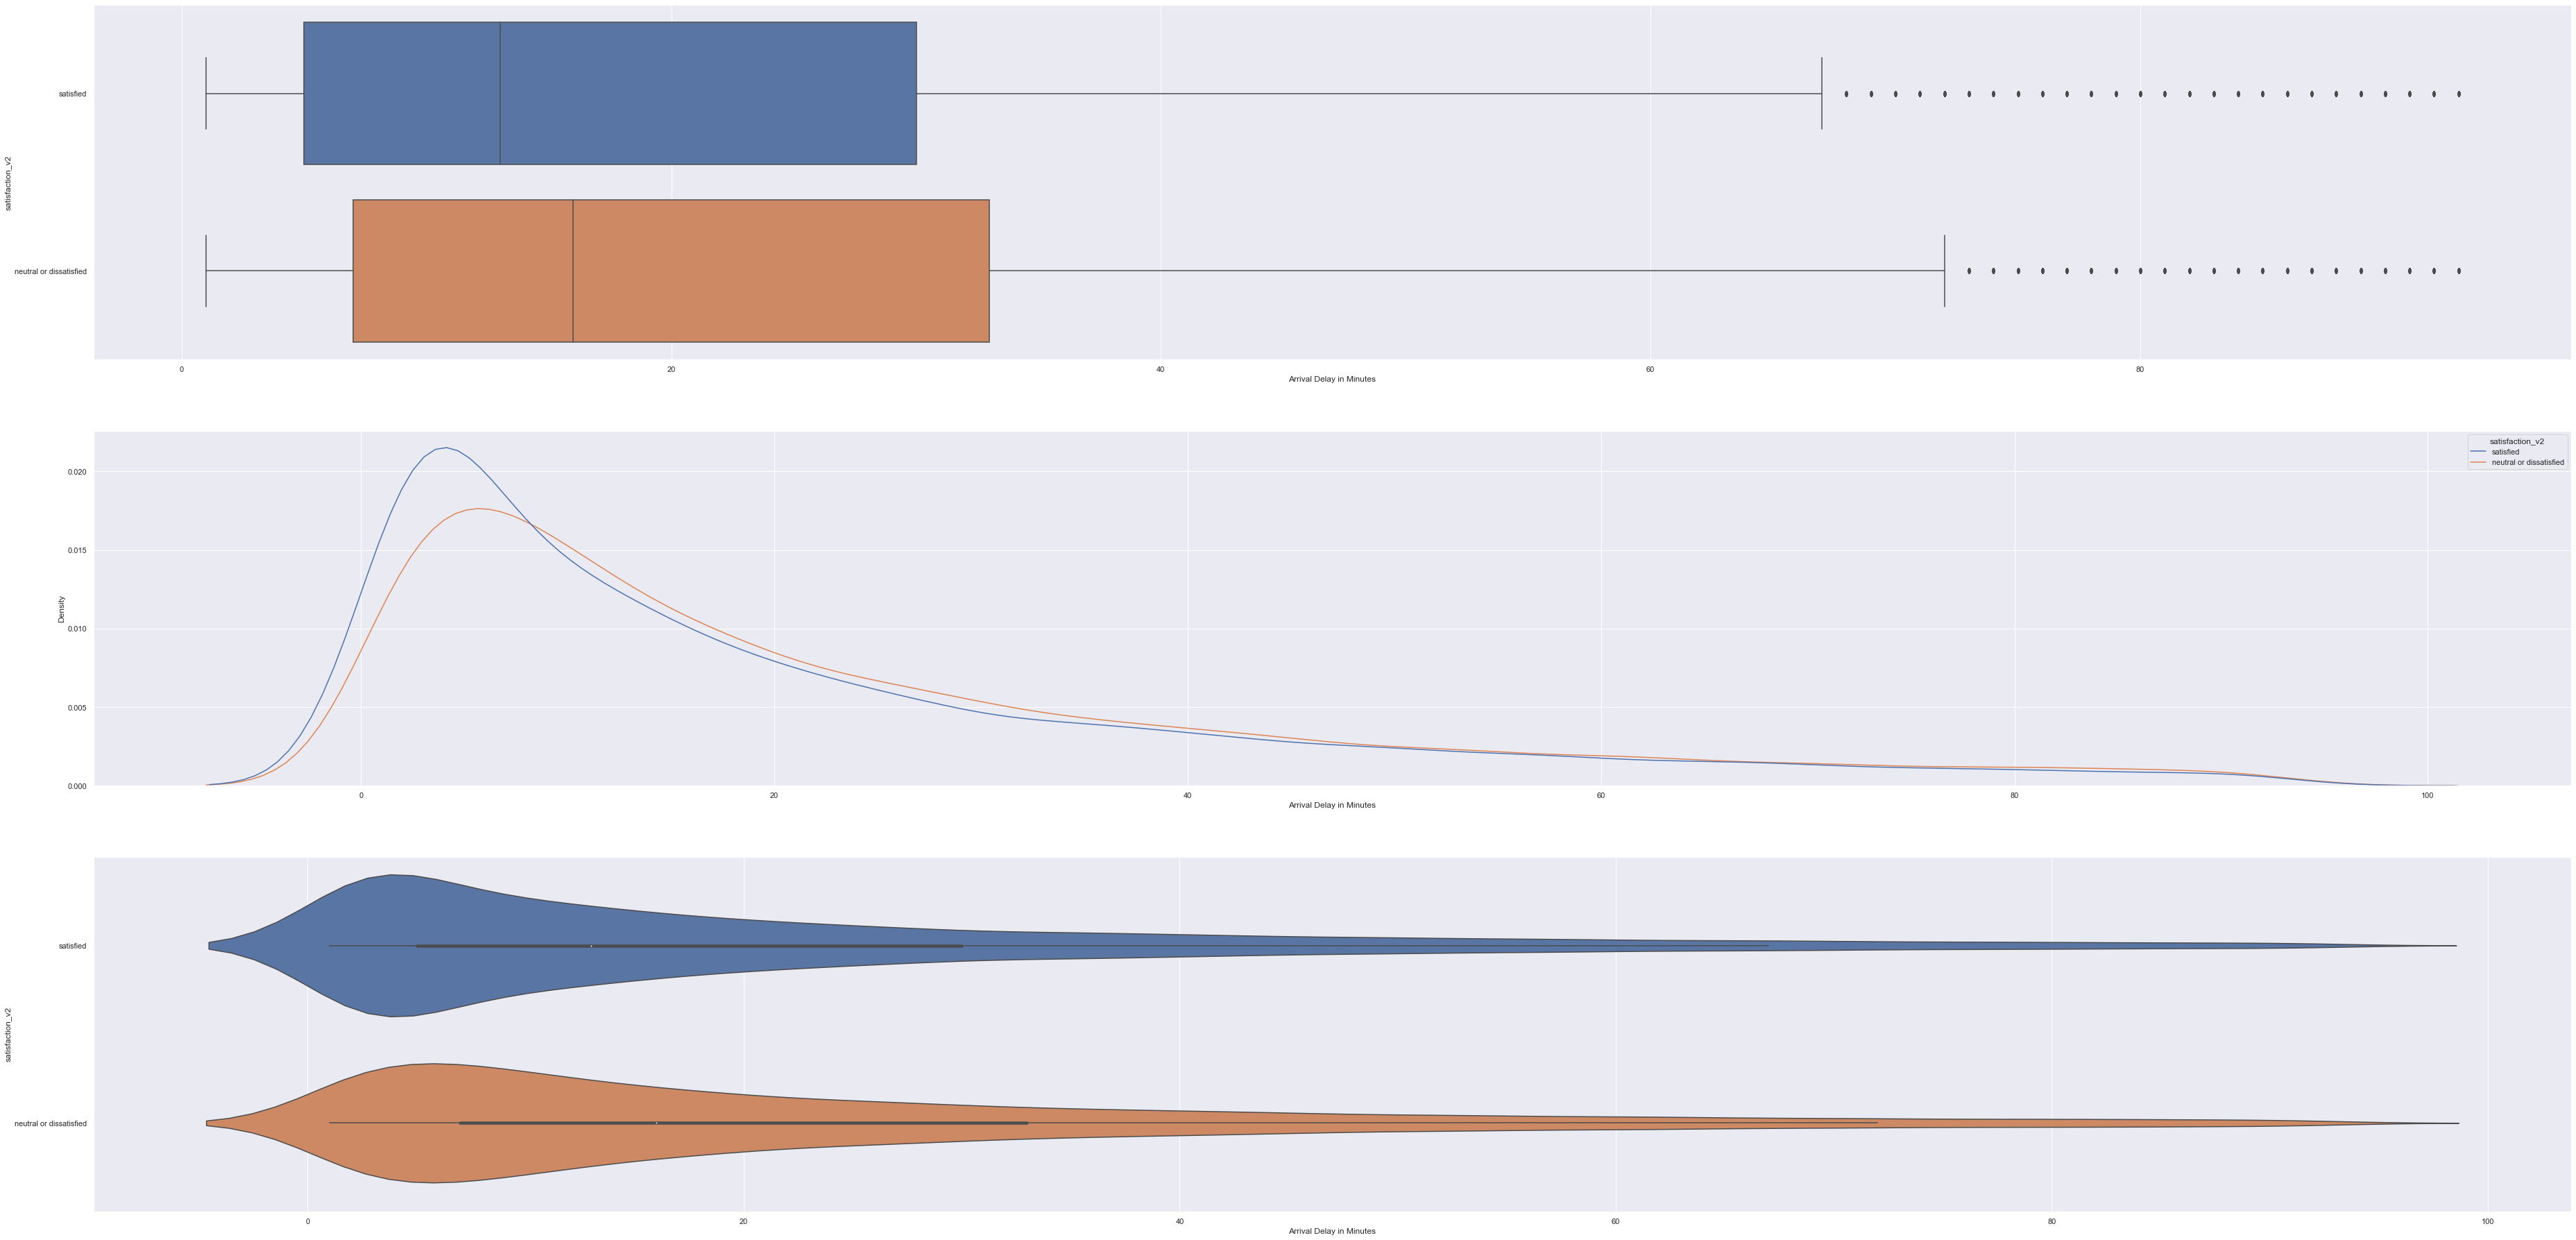

In [48]:
f, axes = plt.subplots(3, 1, figsize=(64, 32))
sb.boxplot(data = arriveDelayDataClean, orient = "h", ax = axes[0],
          x ='Arrival Delay in Minutes', y = 'satisfaction_v2')
sb.kdeplot(data = arriveDelayDataClean, ax = axes[1],
          x ='Arrival Delay in Minutes', hue = 'satisfaction_v2')
sb.violinplot(data = arriveDelayDataClean, orient = "h", ax = axes[2],
          x ='Arrival Delay in Minutes', y = 'satisfaction_v2')

In [49]:
test = satisfactionData;
#print(test)
scale_mapper = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5}
scaled = test["Seat comfort"].replace(scale_mapper) 

from pandas.api.types import CategoricalDtype

cat_type_ratings = CategoricalDtype(categories=[0,1,2,3,4,5], ordered=True)
test["Seat comfort"].astype(cat_type_ratings, )
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   id                                 129880 non-null  int64   
 1   satisfaction_v2                    129880 non-null  object  
 2   Gender                             129880 non-null  object  
 3   Customer Type                      129880 non-null  category
 4   Age                                129880 non-null  int64   
 5   Type of Travel                     129880 non-null  object  
 6   Class                              129880 non-null  object  
 7   Flight Distance                    129880 non-null  int64   
 8   Seat comfort                       129880 non-null  int64   
 9   Departure/Arrival time convenient  129880 non-null  int64   
 10  Food and drink                     129880 non-null  int64   
 11  Gate location             

In [50]:
test["Seat comfort"]

0         0
1         0
2         0
3         0
4         0
         ..
129875    5
129876    2
129877    3
129878    3
129879    3
Name: Seat comfort, Length: 129880, dtype: int64

In [51]:
test = pd.DataFrame(satisfactionData)
test['Arrival Delay in Minutes'].fillna(value=0, inplace=True)

In [52]:
from pandas.api.types import CategoricalDtype

cat_type_ratings = CategoricalDtype(categories=[0,1,2,3,4,5], ordered=True)
cat_type_class = CategoricalDtype(categories=['Eco', 'Eco Plus', 'Business'], ordered=True)

test["Class"] = test["Class"].astype(cat_type_class)
test["Class"]

0              Eco
1         Business
2              Eco
3              Eco
4              Eco
            ...   
129875         Eco
129876    Business
129877         Eco
129878         Eco
129879         Eco
Name: Class, Length: 129880, dtype: category
Categories (3, object): ['Eco' < 'Eco Plus' < 'Business']

In [53]:
test.iloc[:,8:22] = test.iloc[:,8:22].astype(cat_type_ratings)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   id                                 129880 non-null  int64   
 1   satisfaction_v2                    129880 non-null  object  
 2   Gender                             129880 non-null  object  
 3   Customer Type                      129880 non-null  category
 4   Age                                129880 non-null  int64   
 5   Type of Travel                     129880 non-null  object  
 6   Class                              129880 non-null  category
 7   Flight Distance                    129880 non-null  int64   
 8   Seat comfort                       129880 non-null  category
 9   Departure/Arrival time convenient  129880 non-null  category
 10  Food and drink                     129880 non-null  category
 11  Gate location             

In [54]:
# Removed redundant date

test = test.drop(['Gender','Customer Type','Age','Type of Travel','Class'], axis = 1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   id                                 129880 non-null  int64   
 1   satisfaction_v2                    129880 non-null  object  
 2   Flight Distance                    129880 non-null  int64   
 3   Seat comfort                       129880 non-null  category
 4   Departure/Arrival time convenient  129880 non-null  category
 5   Food and drink                     129880 non-null  category
 6   Gate location                      129880 non-null  category
 7   Inflight wifi service              129880 non-null  category
 8   Inflight entertainment             129880 non-null  category
 9   Online support                     129880 non-null  category
 10  Ease of Online booking             129880 non-null  category
 11  On-board service          

In [55]:
from sklearn.preprocessing import OrdinalEncoder
cats = [0,1,2,3,4,5]
ordi = OrdinalEncoder(categories=[cats])
ordi.fit(test[['Seat comfort']])


OrdinalEncoder(categories=[[0, 1, 2, 3, 4, 5]])

In [56]:
encoded = pd.DataFrame(ordi.transform(test[['Seat comfort']]),columns=['Seat comfort'])
encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Seat comfort  129880 non-null  float64
dtypes: float64(1)
memory usage: 1014.8 KB


In [57]:
test['Seat comfort'].unique()

[0, 1, 4, 5, 2, 3]
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

In [58]:
y = pd.DataFrame(test['satisfaction_v2'])
X = pd.DataFrame(test.drop('satisfaction_v2', axis = 1))
dectree = DecisionTreeClassifier(max_depth = 5)  # change max_depth to experiment
dectree.fit(X, y)
# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, precision=0,
          feature_names=X.columns, 
          class_names=["neutral or dissatisfied","satisfied"])

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree


# Extract Response and Predictors
y = pd.DataFrame(test['satisfaction_v2'])
X = pd.DataFrame(test.drop('satisfaction_v2', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["neutral or dissatisfied","satisfied"])